# Introduction

Brennan Danek (bd4bk@virginia.edu) DS 5001 Spring 2023

It has often been said, and attributed to many, that History is written by the victors. While this is often discussed in the context of warfare and post-bellum societies, this principle applies to historically marginalized populations as well. Those in power often have the means and motives to shape historical narratives, both in their production and dissemination. While there have been many populations marginalized throughout the history of the United States, few have had an impact on the country's formation as profound as the enslaved people conscripted from Africa. One cannot parse out the bias in our history that comes from centuries of marginalization of a people. However, using primary sources that have been preserved from these times can be a critical step in beginning to understand what life may have truly been like in antebellum and postbellum America. 

UNC-Chapel Hill has created a collection of books, stories, and articles from self-emancipated and formerly enslaved Black Americans throughout the past few centuries. In this paper, I will investigate an auto-biographical subset of this collection in hopes of reaching a deeper, more complete understanding of the lives of formerly enslaved people. I hope to investigate the themes that reoccur throughout these texts relating to slavery, as well as understand the experiences of these people not directly related to enslavement, but certainly affected by it.

# Source Data

The original collection of North American Slave Narratives contains nearly 300 texts ranging from the 17th century to just after the turn of the 20th century (https://virginia.box.com/s/f82eduef7qxc1dh1jy65g1vrbdcv7227). I am most interested in texts specifically labeled as auto-biographies, as I feel these texts are more likely to be authentic, may include strong emotions, and will generally share a structure. I selected a subset of this collection by searching for 'autobiography' in the title, which left me with nearly 30 texts to work with. After manually parsing through the text to develop an OHCO model for my analysis, I decided on 21 texts that matched my criteria.

In [1]:
import numpy as np
import pandas as pd

data_in = 'output'
OHCO = ['book_id','chap_num', 'para_num', 'sent_num', 'token_num']


LIB_F2 = pd.read_csv('{}/LIB_F2.csv'.format(data_in), index_col = OHCO[:1])
LIB_F2[['Author','Date','Title','chap_len','word_len']]

Author  Date  \
book_id                                 
24         Booker T. Washington  1901   
14         Samuel Ringgold Ward  1855   
17          James Lindsay Smith  1881   
25                Amanda  Smith  1893   
18               Nicholas  Said  1873   
286                 Emma J. Ray  1926   
74              Peter  Randolph  1893   
86                  M. L. Latta  1903   
12                M. F. Jamison  1912   
22               Josiah  Henson  1881   
289              Josiah  Henson  1876   
76             William H. Heard  1928   
20           Francis  Frederick  1869   
49         Henry Ossian Flipper  1878   
256             Kate  Drumgoold  1898   
26             Israel  Campbell  1861   
13       Martha Griffith Browne  1857   
277                 J. R. Beard  1863   
28                Sam  Aleckson  1929   
290        Booker T. Washington  1901   
291       Thomas William Burton  1910   

                                                     Title  chap_len  word_len  
book_id                                                                         
24         An Autobiography: The Story of My Life and Work        23     85463  
14       Autobiography of a Fugitive Negro: His Anti-Sl...        24     91963  
17       Autobiography of James L. Smith, Including, Al...        12     43064  
25       An Autobiography: The Story of the Lord's Deal...        36    208110  
18       The Autobiography of Nicholas Said, A Native o...        13     29103  
286      Twice Sold, Twice Ransomed: Autobiography of M...        37     89018  
74       From Slave Cabin to the Pulpit. The Autobiogra...        26     47169  
86       The History of My Life and Work. Autobiography...        32     81977  
12       Autobiography and Work of Bishop M. F. Jamison...        24     99768  
22       An Autobiography of the Rev. Josiah Henson ("U...        32     65445  
289      Uncle Tom's Story of His Life. An Autobiograph...        30     54255  
76       From Slavery to the Bishopric in the A.M.E. Ch...        10     11475  
20       Autobiography of Rev. Francis Frederick, of Vi...         8     10525  
49       The Colored Cadet at West Point. Autobiography...        16     93420  
256      A Slave Girl's Story. Being an Autobiography o...         6     22211  
26       An Autobiography. Bond and Free:  Or, Yearning...        32     80756  
13                         Autobiography of a Female Slave        41    134131  
277      Toussaint L'Ouverture: A Biography and Autobio...        25    119372  
28       Before the War, and After the Union.  An Autob...        18     27122  
290                      Up from Slavery: An Autobiography        17     73862  
291      What Experience Has Taught Me: An Autobiograph...        10     17163

In [2]:
int(LIB_F2.chap_len.mean())

22

In [3]:
int(LIB_F2.word_len.mean())

70732

The average text length is 22 chapters and roughly 70000 words. The texts are provided in both .xml and .txt formats, however I choose to use the unformatted .txt files due to my familiarity with using them. For this reason, I must parse through the texts to develop the chapter, paragraph, and sentence, and token breaks. While most of the texts using the same format for each chapter, they do vary slightly in terms of punctuation, chapter title, and chapter title placement. Paragraphs are marked with newlines, and sentences and tokens are parsed using `nltk` sentence and word tokenization.

I use `nltk` POS tagging during the tokenization processing, as well. This is to allow for the POS tagger to use the sentence context to predict token POS, as during tagging at the token level afterwards would rely on using only prior, preloaded statistics to make predictions.

# Data Model

In my data models, I bag the texts at the chapter level, giving a bag of `[book_id,chap_num]`. This is because I expect similarities between paragraphs across the texts. Many authors, for example, speak about life both during enslavement and after emancipation. Chapters will represent times of either enslavement or emancipation, and so bagging on them will allow for our analysis to hopefully interpret different chapters from different texts as similar, given that they are referring to congruent time periods in each author's life in regards to their freedom.

A cursory look at terms ranked based on their average Term Frequency-Inverse Document Frequency values shows that there may be some validity to the idea that bagging on Chapter can explore different but similar time periods in each author's life.

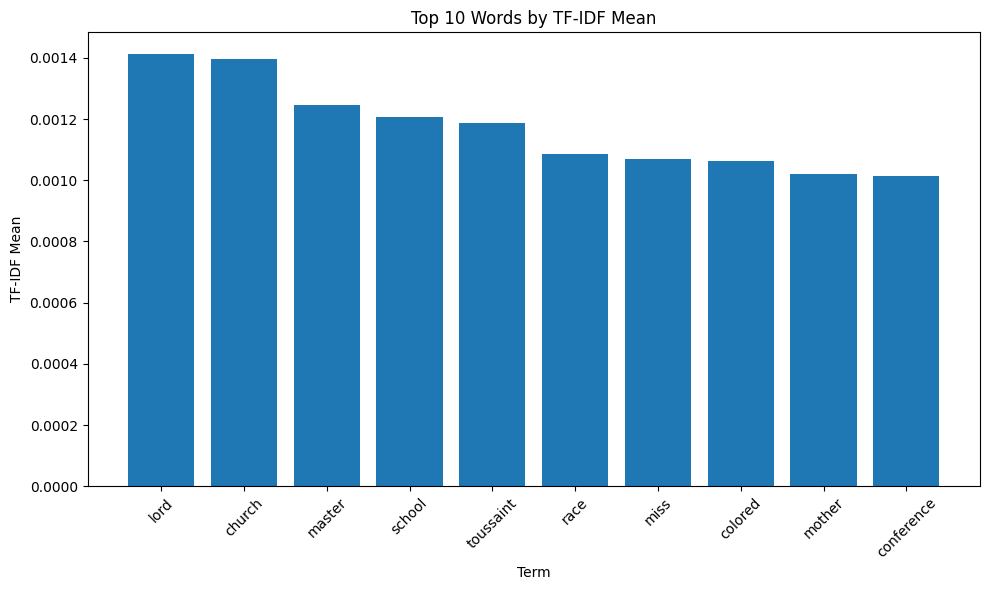

In [4]:
import matplotlib.pyplot as plt

VOCAB_F4 = pd.read_csv('{}/VOCAB_F4.csv'.format(data_in), index_col = 'term_str')
sorted_vocab = VOCAB_F4[VOCAB_F4.stop!=1].sort_values('tfidf_mean', ascending=False)

top_10_words = sorted_vocab.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_words.index.values, top_10_words['tfidf_mean'])
plt.xlabel('Term')
plt.ylabel('TF-IDF Mean')
plt.title('Top 10 Words by TF-IDF Mean')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

'lord' and 'church' are the two highest average TF-IDF words in the text. This means that throughout the corpus, there are chapters that clearly have a higher focus on religion than others. The third most common word being 'master', which corroborates the idea that bagged chapters can be used to identify different periods in the enslaved authors' lives.

# Exploration and Interpretation

My data exploration began with creating 10 Principal Components from the bagged text. I normalized the rows, as well as centered on column average.

In [5]:
COMP_GLOSS = pd.read_csv('{}/COMP_GLOSS.csv'.format(data_in))

In [6]:
COMP_GLOSS

comp_id                                                pos  \
0     PC0  ['race', 'school', 'coloured', 'institution', ...   
1     PC1  ['master', 'french', 'overseer', 'slave', 'mis...   
2     PC2  ['french', 'island', 'army', 'camp', 'war', 'l...   
3     PC3  ['coloured', 'antislavery', 'school', 'british...   
4     PC4  ['antislavery', 'british', 'coloured', 'americ...   
5     PC5  ['colored', 'preach', 'overseer', 'pastor', 'p...   
6     PC6  ['mother', 'school', 'overseer', 'father', 'ch...   
7     PC7  ['camp', 'class', 'guard', 'examination', 'mil...   
8     PC8  ['camp', 'class', 'mother', 'antislavery', 'ra...   
9     PC9  ['boat', 'ye', 'whilst', 'river', 'captain', '...   

                                                 neg  
0  ['master', 'mother', 'pray', 'mistress', 'pray...  
1  ['meeting', 'school', 'colored', 'praise', 'pa...  
2  ['school', 'master', 'overseer', 'coloured', '...  
3  ['race', 'colored', 'problem', 'institution', ...  
4  ['camp', 'french', 'army', 'guard', 'school', ...  
5  ['school', 'french', 'coloured', 'whilst', 'bu...  
6  ['boat', 'river', 'journey', 'captain', 'road'...  
7  ['mother', 'race', 'boat', 'island', 'river', ...  
8  ['master', 'district', 'committee', 'school', ...  
9  ['master', 'mistress', 'french', 'coloured', '...

There are some PCs that immediately stick out. The first PC looks like it may differentiate between chapters taking about experiencing slavery (master, mistress, pray) and discussing slavery, or the black experience, in the abstract (colored, race, school, institution). French vs British and American authors may be differentiated by PC4. PC5 includes a couple religious words in its positive association, and could represent religions chapters.

In [7]:
import plotly_express as px

def vis_pcs(M, a, b, label='author', hover_name='disp', symbol=None, size=None):
    fig = px.scatter(M, f"PC{a}", f"PC{b}", color=hover_name, 
                     symbol=symbol, size=size,
                     marginal_x='box', height=800)
    fig.show()

BAG = OHCO[:2]
DOCS_PCA = pd.read_csv('{}/DOCS_PCA.csv'.format(data_in), index_col = BAG)

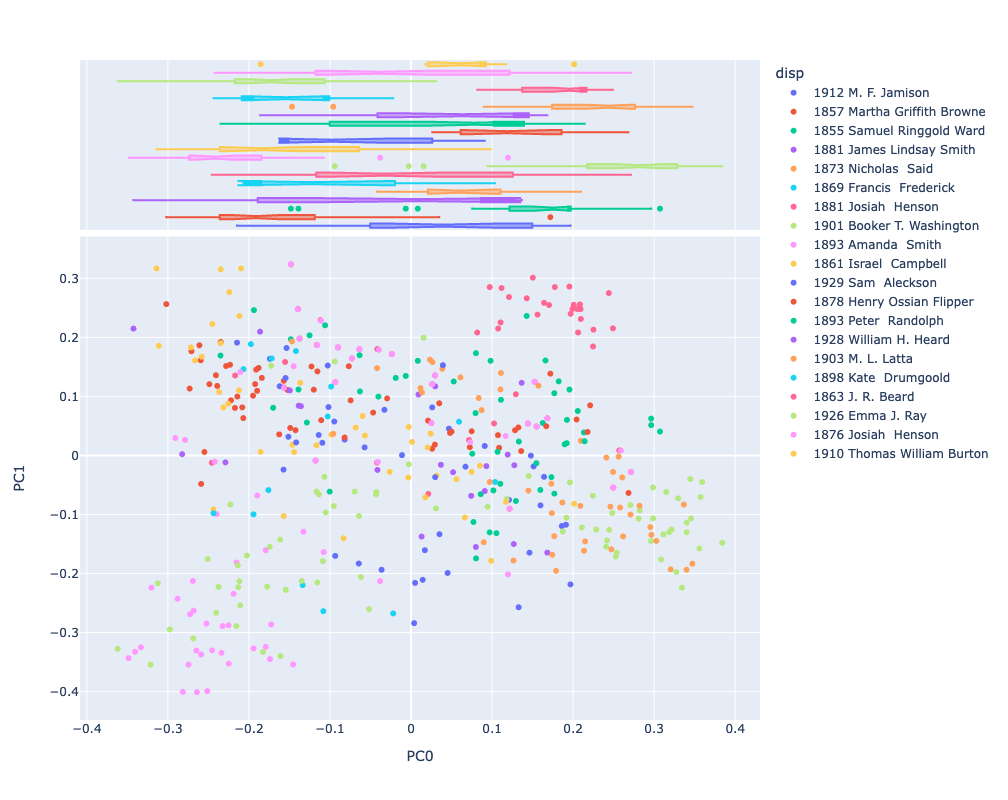

In [8]:
vis_pcs(DOCS_PCA, 0, 1)

When looking at the chapters across the second two principal components (ignoring PC0, which does not seem to provide much ifo), there are a few patterns that emerge. Older texts appear to score lower of PC0, and newer texts higher. PC0 could be capturing words or chapters dealing with freedom from enslavement, or represent possibly better treatment of the author's the further away from slavery the text was written. Another interesting point to note is that two of the three female authors in the set, Amanda Smith and Emma J. Ray, comprise almot all of the chapters with low PC0 and PC1 scores. PC1 could be capturing another measure of power or social status, as their low values in both would indicate their oppression from enslavement as well as other factors in society. This theory is strengthened by the fact that three authors who scored highly in PC1, Booker T Washington, Isreal Campbell, and J.R. Beard all found forms of social power after emancipation through either the church or higher education. This bottom left corner of the firs two principal components may represent the intersectionality of marginalization present even in the 1800s.

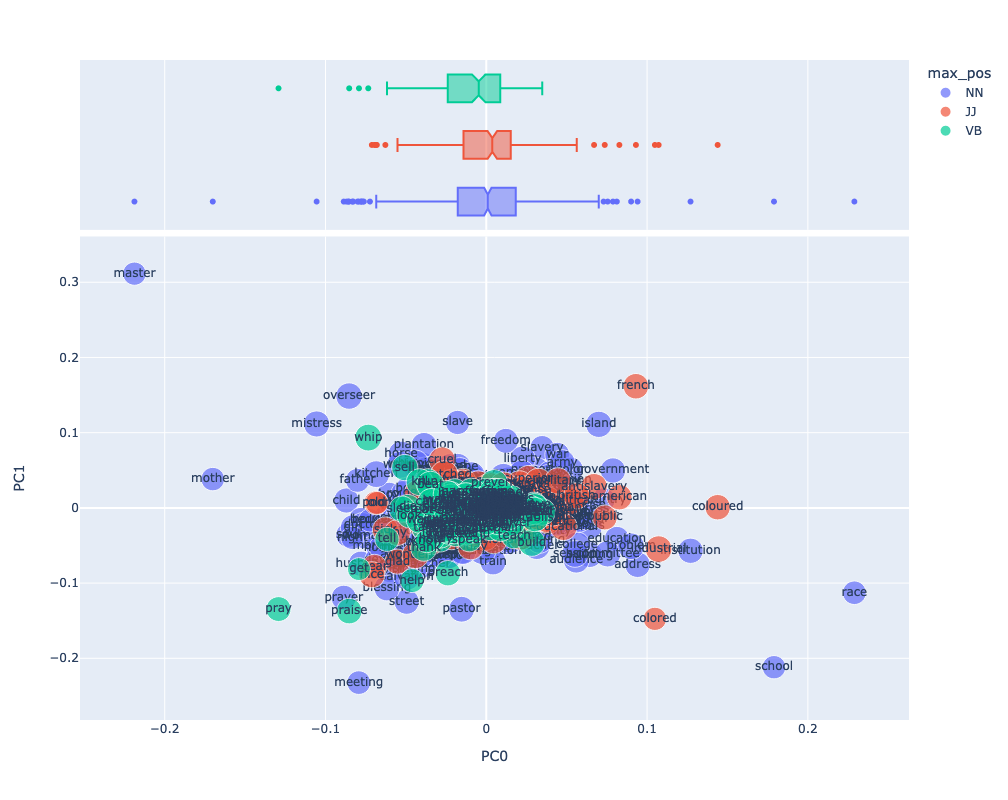

In [9]:
def vis_loadings(X,a=0, b=1, hover_name='term_str'):
    return px.scatter(X.reset_index(), f"PC{a}", f"PC{b}", 
                  text='term_str', size='i', color='max_pos', 
                  marginal_x='box', height=800)

VOCAB_PCA = pd.read_csv('{}/VOCAB_PCA.csv'.format(data_in), index_col = 'term_str')

vis_loadings(VOCAB_PCA)

The word loadings help give credence to this idea. 'Master' and 'school' are practically adjacent across PC0 and PC1. Words scoring lower on PC0 seem to relate more to the instituion of slavery. For example, 'master' scores very low on PC0, as do words like 'mistress', 'overseer', 'whip', and 'plantation'. On the other side of PC0 are words like 'school', 'colored', 'institution', 'building', and 'education'. These concepts contrast to the marginalization that occurs from enslavement, and might relate to more positive autobiographical information coming from authors further separated from slavery chronologically, like shown in the previous PCA chart. It should be noted that 'slave' and 'freedom' have roughly the same PC1 score, but sit on opposite sides of the PC0 middle of zero. This is further indicatoin that PC0 represents a divided between enslavement and life afterwards. The final piece of evidence pointing to this interpretaton of PC0 is the distribution of parts of speech. Lower PC0 words are more likely to be verbs, possibly describing things that happened to them or others. Higher PC0 words are more often nouns, possibly representing newly acquired property or rights like the right to education.

While PC1 does not seem to represent much of an intersectionality in the society, we can see that the lower PC1 words are often more abstract than high PC1 words. The bottom left corner is now occupied with word relating to religion, indicating that during enslavement, authors may have relied on religion as the abstract belief that kept them going.

Next, I used LDA to produce topic models using 20 topics. The actual topics did not appear to be as useful in terms of their meaning as the PCA components. However, I did use them to try and identify which authors may have lived similar lives, represented by clustering the topics with their most related author. This seems to work fairy well, as the first cluster's topics relate to politics and war, as military terms like cadet, crime, war, army, and solders are present, as well as country, liberty, election, colony, and constitution. The second cluster seems to indicate authors who focused relatively more on their time enslaved as opposed to the other authors. Words like slavery, master, plantation, children, work, and home are found here.
The third cluster represents a combination of religious theme and traditional gender roles. Words like mother, school, children, preacher, pastor, baptism, faith, and home are used here. Also, two of the three women authors are located in this cluster. the final cluster is a little vague, but may be used to classify authors who spoke of abstract ideas often in their autobiographies. Words like institution, condition, country, races, cause, brethren, prejudice, and problem are found here, and they could show that these authors sought to explain the systems that opressed them in their works.

<Figure size 640x480 with 0 Axes>

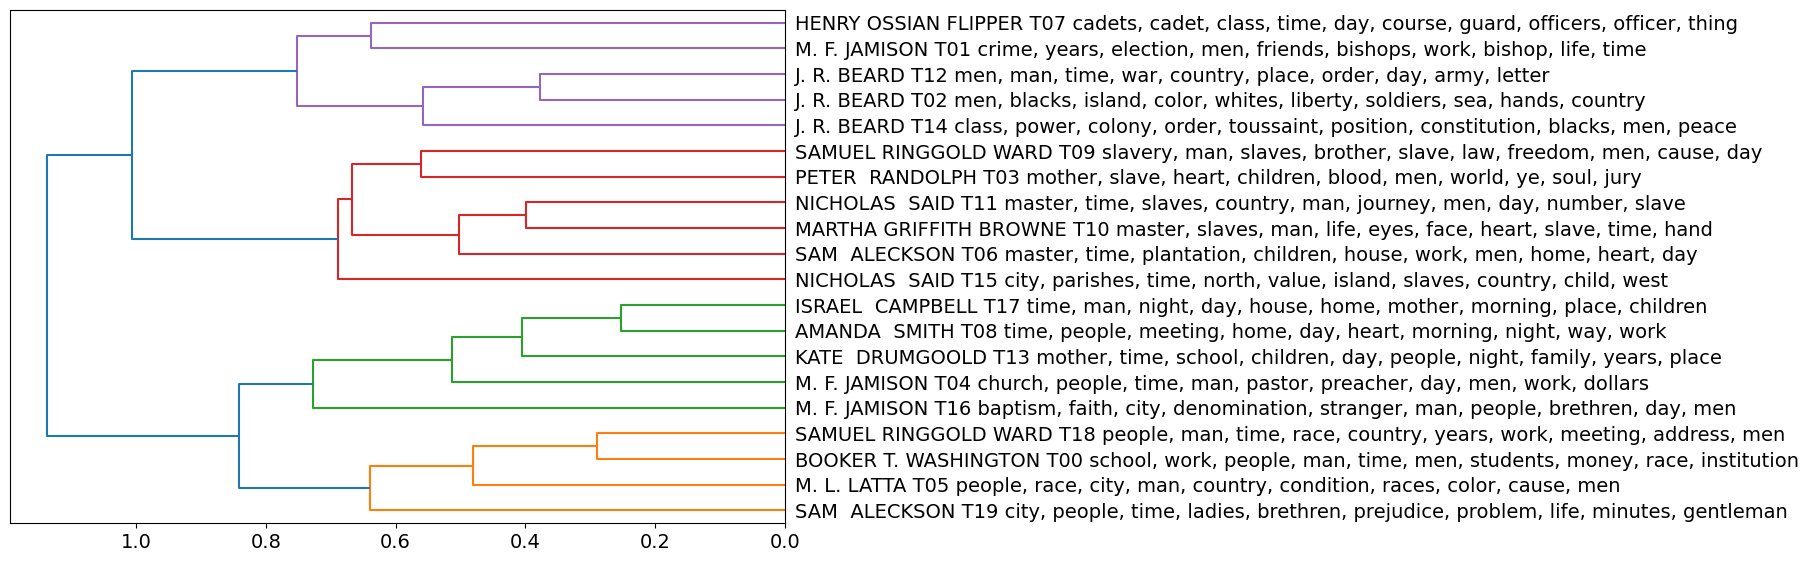

In [10]:
import sys; sys.path.append('')
from hac import HAC

PHI_LDA = pd.read_csv('{}/PHI_LDA.csv'.format(data_in),index_col = 'topic_id')
TOPICS_LDA = pd.read_csv('{}/TOPICS_LDA.csv'.format(data_in), index_col = 'topic_id')


labels  = [f"{a.upper()} {b}" for a, b in zip(TOPICS_LDA.author, TOPICS_LDA.label)]
HAC(PHI_LDA, labels=labels).plot();

Word embeddings were also calculated using `word2vec`, were then transformed into a 2D space using `TSNE`. The interpretations of the graph space is not as simple as is it with the PCA components, however. Nouns used to describe people are found in the far left of this plot. Interstingly enough, 'blacks' and 'whites' are almost overlayed on top of each other. This does make sense, as the contexts in which either race of person is talked about in these autobiographies is the same context in which the other race would be mentioned (conversations on slavery and racism involve discussing both races of people). Many abstractions are found at the very top of the 2D space. Words like education, rights, respect, race, prejudice, and law are all found here. Interestingly enough, 'negro' is also found in this space, even though 'blacks' and 'coloured' are located clearly to the left with the other personal descriptors. This shows that this word is used more abstractly to refer to the collective experience of the enslaved Black Americans at the time. The bottom represents common items or ideas from everyday life, like morning, horse, breakfast, and rain.

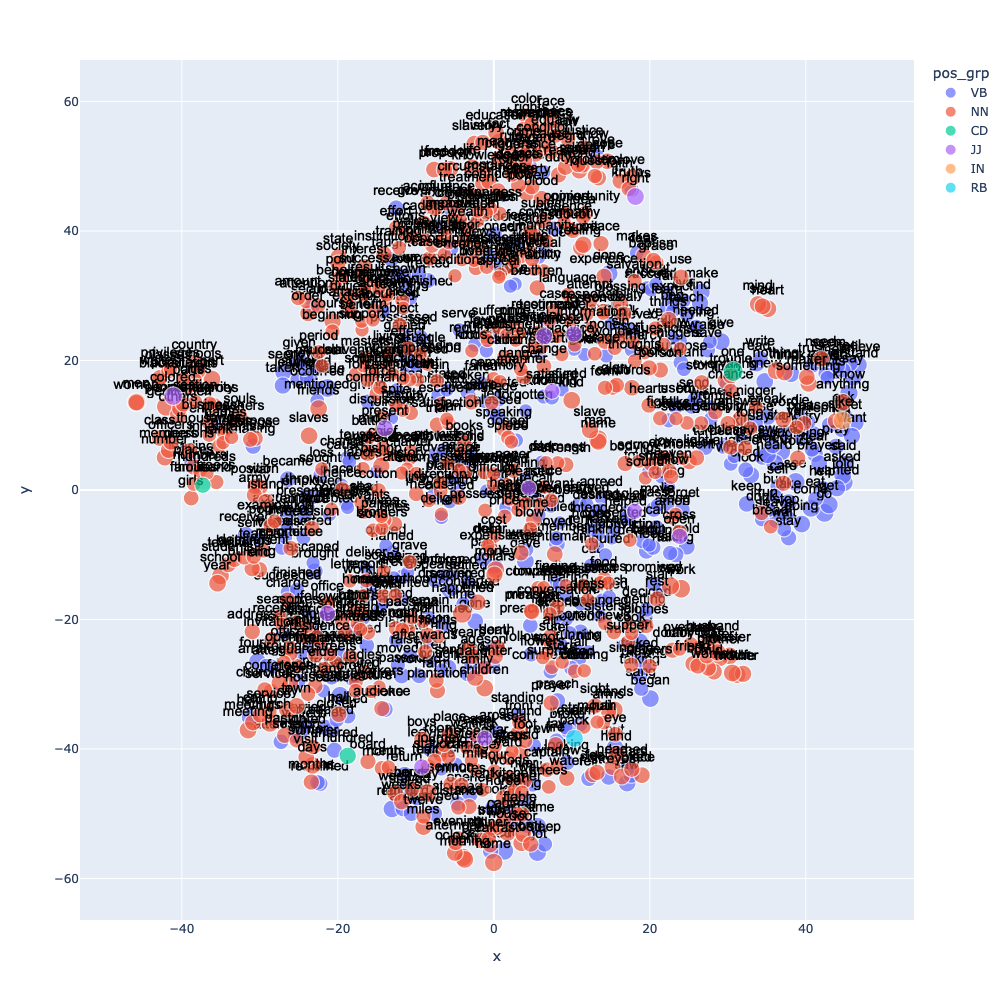

In [11]:
coords = pd.read_csv('{}/coords_W2V.csv'.format(data_in), index_col = 'term_str')
px.scatter(coords.reset_index(), 'x', 'y', 
           text='term_str', 
           color='pos_grp', 
           hover_name='term_str',          
           size='logn',
           height=1000).update_traces(
                mode='markers+text', 
                textfont=dict(color='black', size=14, family='Arial'),
                textposition='top center')

The final part of my exploration involved looking at the overall sentiments of the texts. I went in to this expecting to see highly negative sentiments throughout the texts, but to my surprise roughly half of the texts are classified as overall positive. I see two possible reasons for this. The first one is that `nrc`s sentiment analysis of words for trust does not work well with this older dataset. Almost all of the texts have trust as their strongest emotion, and a further look at the words labeled as 'trust' leads me to question this ('antifungal' was labeled as a positive trust word). However, another explanation, which I do believe is also responsible, is that the autobiographies of enslaved people are not going to be fully negative. This is due to the fact that enslaved and formerly enslaved people are more than just their oppression. Their autobiographies and lives, just like everyone else's, is filled with influxes and emotions, and they do not let their stories be defined solely by their enslavement. It would be dismissive, perpetuating generations of marginalization, to believe that enslaved people were one-dimensional beings whose emotions were limited due to their oppression. 

Another less optimistic interpretation, however, could be that the dismantling of some systematic oppression (freedom from enslavement) could be the driving factor behind positive sentiment found in this text. Slavery and racism being the norms of the time probably meant that, as horrific as the institution of slavery was, it was certainly normalized in society, which impacts how individuals view it. It is possible that the high sentiments of joy in these texts represent the normalization of violence of the oppressed in America at the time, and the disruption of this violence created stronger emotional feelings than its continuation up until the beginning of emancipation.

In [12]:
BOOKS_sent = pd.read_csv('{}/BOOKS_sent.csv'.format(data_in), index_col = 0)

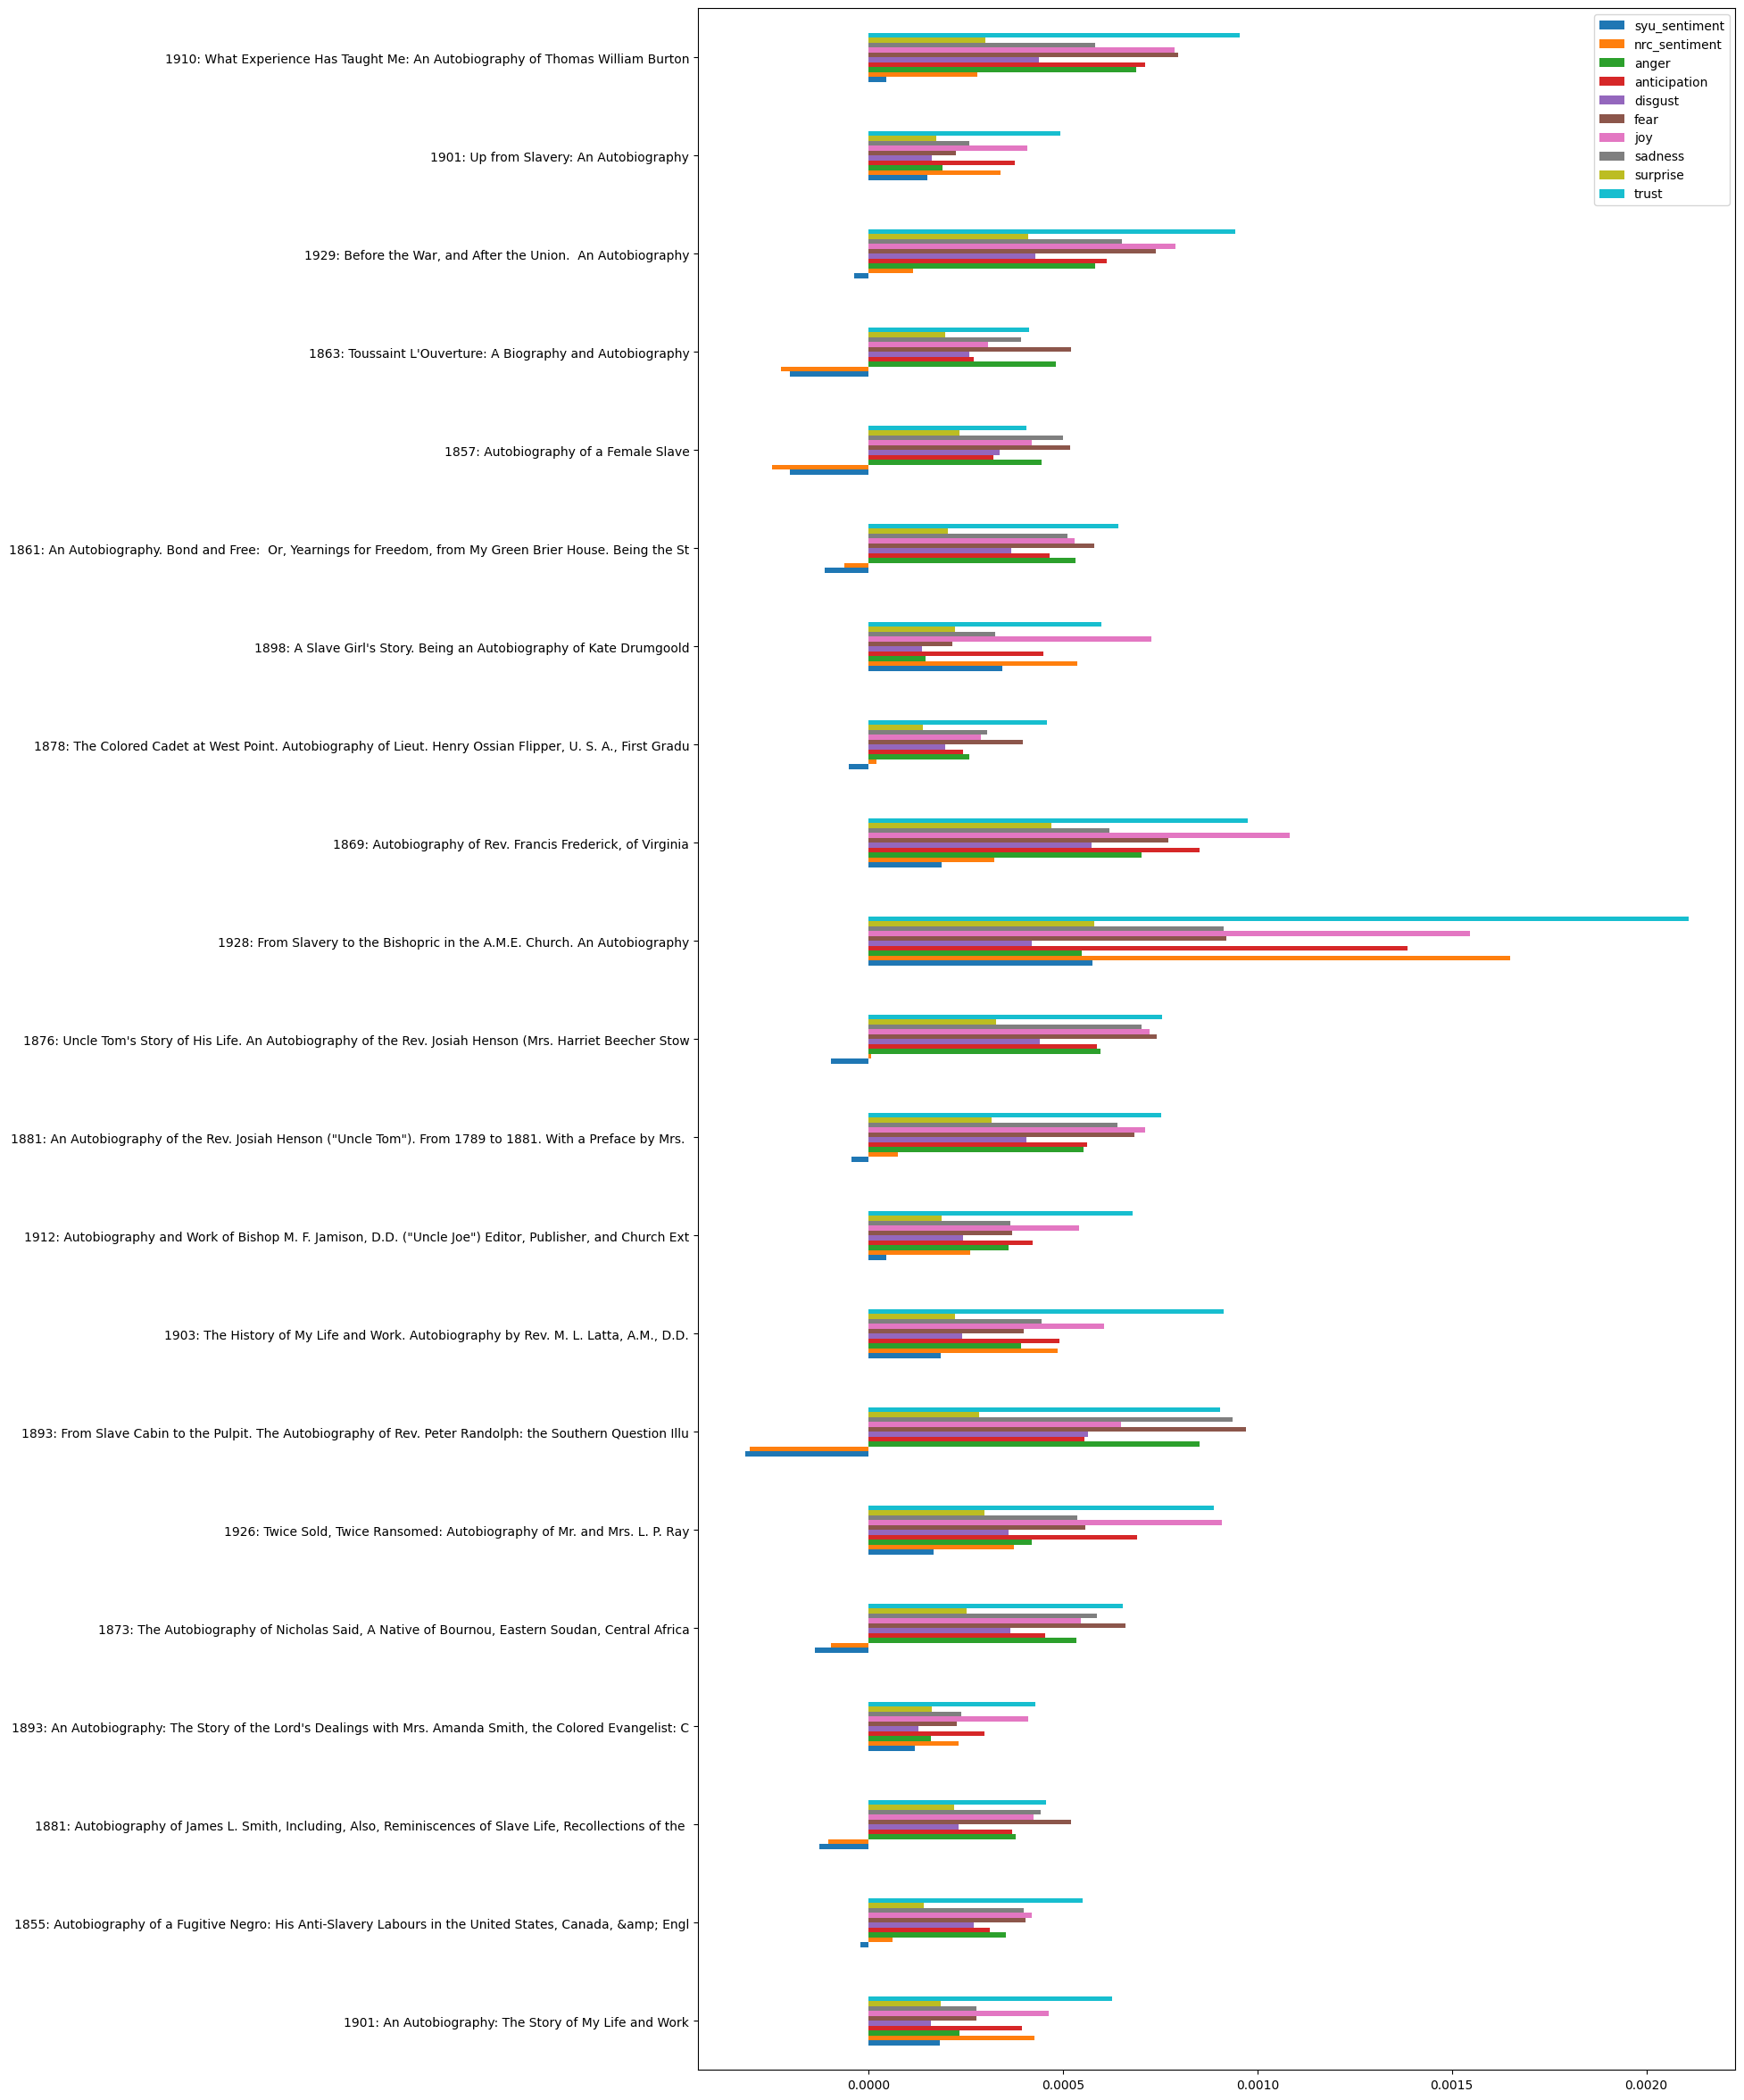

In [13]:
BOOKS_sent.iloc[:,2:].plot.barh(figsize=(15,30));

# Conclusion

There are clear patterns that emerge from this corpus indicating that the enslaved people's experience not only varied widely between individuals, but also that their experiences varied widely within their life. Enslaved people chose to write about vastly different aspects of their lives, including but not limited to their experiences while enslaved, their thoughts on the systems at play in America in regards to race, their faith, and even the joys they experienced, enslaved or not. These stories are often not a part of the conversation when it comes to the history of America, but hopefully my analysis can begin to shed light on this important aspect of American History.